In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import skimage.io
from glob import glob

In [2]:
data_folder="/Users/kanhua/Downloads/data/Train/"
image_paths = glob(os.path.join(data_folder, 'CameraRGB', '*.png'))
label_paths = glob(os.path.join(data_folder, 'CameraSeg', '*.png'))

images = []
gt_images = []

In [3]:
num_classes=13
label_agg=np.zeros((len(label_paths),num_classes))

car_hood=np.load("hood_mask.npy")
for i in range(len(label_paths)):
    label_file=label_paths[i]
    img_array=skimage.io.imread(label_file)
    img_label=img_array[:,:,0]
    img_label=img_label*car_hood
    for nk in range(num_classes):
        class_label=(img_label==nk)
        label_agg[i,nk]=np.sum(class_label)

(array([1.583e+03, 8.450e+02, 4.600e+02, 3.230e+02, 2.020e+02, 1.450e+02,
        1.040e+02, 9.400e+01, 6.800e+01, 5.900e+01, 6.200e+01, 4.500e+01,
        4.200e+01, 4.200e+01, 1.100e+02, 4.500e+01, 8.300e+01, 1.120e+02,
        3.900e+01, 3.300e+01, 3.000e+01, 6.100e+01, 2.900e+01, 1.800e+01,
        2.200e+01, 7.000e+00, 1.200e+01, 1.300e+01, 7.000e+00, 8.000e+00,
        4.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 6.000e+00,
        0.000e+00, 2.400e+01, 3.700e+01, 1.300e+01, 2.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([    0.  ,  1245.04,  2490.08,  3735.12,  4980.16,  6225.2 ,
         7470.24,  8715.28,  9960.32, 11205.36, 12450.4 , 13695.44,
        14940.48, 16185.52, 17430.56, 18675.6 , 19920.64, 21165.68,
        22410.72, 23655.76, 24900.8 , 26145.84, 27390.88, 28635.92,
        29880.96, 31126.  , 32371.04, 33616.08, 34861.12, 36106.16,
        37351.2 , 38596.24, 39841.28

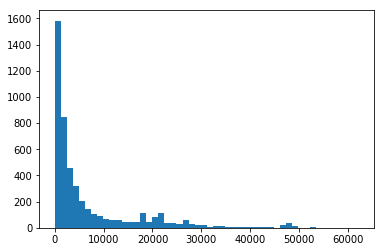

In [4]:
plt.hist(label_agg[:,10],bins=50)

In [5]:
np.sum(label_agg[:,10]>10000)

1062

## compute the pixels

In [18]:
num_classes=13
label_agg=np.zeros((len(label_paths),num_classes))
threshold=10000
upper_crop=170
bot_crop=520

car_hood=np.load("hood_mask.npy").astype(np.bool)
for i in range(len(label_paths)):
    label_file=label_paths[i]
    img_array=skimage.io.imread(label_file)
    img_label=img_array[:,:,0].astype(np.uint8)
    img_label=img_label*car_hood
    img_label=img_label[upper_crop:bot_crop,:]
    for nk in range(num_classes):
        class_label=(img_label==nk)
        label_agg[i,nk]=np.sum(class_label)

In [33]:
filtered_label=label_agg[label_agg[:,10]>10000]

In [40]:
def get_p(label_agg):
    car_pixels=np.sum(label_agg[:,10])
    road_pixels=np.sum(label_agg[:,7])
    all_pixels=np.sum(label_agg)
    p_veh=(car_pixels)/(all_pixels)
    p_road=(road_pixels)/(all_pixels)
    p_none=1-p_veh-p_road
    print("p_road: {}, p_veh: {},p_none: {}".format(p_road,p_veh,1-p_road-p_veh))
    return p_none,p_road,p_veh

In [41]:
p_hat=get_p(filtered_label)

p_road: 0.30796687516814636, p_veh: 0.08245320823244552,p_none: 0.6095799165994081


In [45]:
p_hat=np.array(p_hat)
w=1/np.log(1.02+p_hat)
print(w)

[ 2.047828    3.52548263 10.25242643]
